In [1]:
using BeamLib: IsotropicArray, steer, music
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P = music(pa, Rxx, d, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 430.59301432840863
 428.2693776485939
 421.4106716692286
 410.3416403608582
 395.5661166313612
 377.71786130541375
 357.50374161025877
 335.64753698329673
 312.8411940563247
 289.7078599240074
   ⋮
 503.730360830075
 462.2175771095199
 430.257813477602
 405.736944899793
 387.2021187206698
 373.65123142481707
 364.4033696935312
 359.0186960870411
 357.2503378407704

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

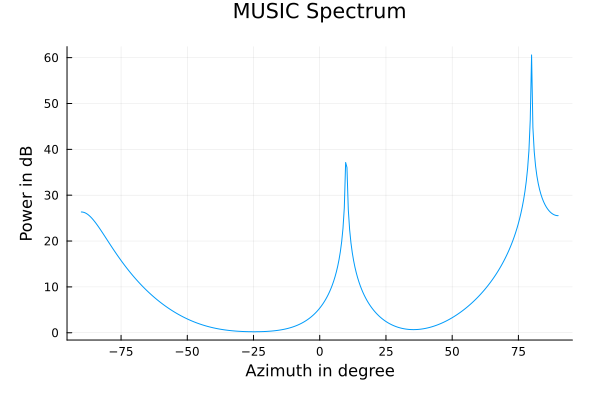

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")